In [1]:
##This code 

import matplotlib as pyplot
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
#import seaborn

FEATUREDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/"
SCORETYPE = ""
MINDIST = 1500
MINQ = 1
percentiles = [0, 50] + list(np.arange(60, 101, 10))


def GetBootstrapCI(data, func):
    numiter = 1000
    vals = []
    for i in range(numiter):
        x = np.random.choice(data, size=data.shape[0], replace=True)
        vals.append(func(x))
    se = np.sqrt(np.var(vals))
    return np.mean(vals)-1.96*se, np.mean(vals)+1.96*se

data=0

In [6]:
# Plot Features

FEAT  = ['UTR3', 'UTR5', 'EXON', 'INTRON','motif_len', 'motif']
data = pd.read_csv(os.path.join("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/Merged_Causality_Features.tableII"), sep="\t")
FX= FEAT[5]
#FX=""

#Choose feature
data  = data.loc [data[FX]=='AC']
#HEAD = "dist.to."+FX
HEAD = "dist.to.tes"

#Plot it
bins = np.percentile(data[data["best.q"]<=MINQ]["best.score"], q = percentiles)
binlabels = []
tss = []
tss_low = []
tss_high = []
tes = []
tes_low = []
tes_high = []

for i in range(len(bins)-1):
    lb = bins[i]
    ub = bins[i+1]
    x = data[(data["best.score"]>lb) & (data["best.score"]<= ub) & (data["best.q"]<=MINQ)]
    feature_tss = x["dist.to.tss"].apply(lambda x: abs(x)<MINDIST)
    feature_tes = x[HEAD].apply(lambda x: abs(x)<MINDIST) ##
    count_tss = np.mean(feature_tss)
    count_tes = np.mean(feature_tes)
    low_tss, high_tss = GetBootstrapCI(feature_tss, np.mean)
    low_tes, high_tes = GetBootstrapCI(feature_tes, np.mean)
    if i == 0:
        base_tss = count_tss
        base_tes = count_tes
    binlabels.append("%s-%s"%(percentiles[i], percentiles[i+1]))
    tss.append(count_tss*1.0/base_tss)
    tss_low.append(low_tss*1.0/base_tss)
    tss_high.append(high_tss*1.0/base_tss)
    tes.append(count_tes*1.0/base_tes)
    tes_low.append(low_tes*1.0/base_tes)
    tes_high.append(high_tes*1.0/base_tes)

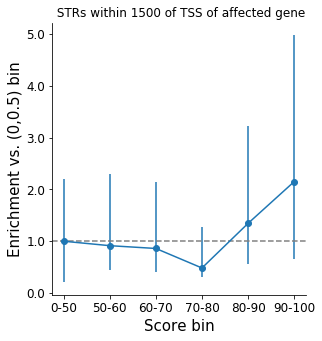

In [7]:
fig = plt.figure()
fig.set_size_inches((10, 5))

# TSS
ax = fig.add_subplot(121)
ax.errorbar(range(len(binlabels)), tss, marker="o", yerr = [tss_low, tss_high])
ax.set_xlabel("Score bin", size=15)
ax.set_ylabel("Enrichment vs. (0,0.5) bin", size=15)
ax.set_xticks(range(len(binlabels)))
ax.set_xticklabels(binlabels, size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.axhline(y = 1.0, linestyle="dashed", color="gray")
ax.set_title("'AT' Motif - STRs within %s of TSS of affected gene"%MINDIST)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()
# features
ax = fig.add_subplot(122)
ax.errorbar(range(len(binlabels)), tes, marker="o", yerr = [tes_low, tes_high])
ax.set_xlabel("Score bin", size=15)
ax.set_ylabel("Enrichment vs. (0,0.5) bin", size=15)
ax.set_xticks(range(len(binlabels)))
ax.set_xticklabels(binlabels, size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.axhline(y = 1.0, linestyle="dashed", color="gray")
ax.set_title(FX+" STRs within %s of %s start"%(MINDIST,FX))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()
plt.show()

In [60]:
def label_it (row):
    if row['INTRON'] == 1 :
        return 'Intron'
    if row['EXON'] == 1 :
        return 'Exon'
    if row['UTR3'] == 1 :
        return '3-UTR'
    if row['UTR5'] == 1:
        return '5-UTR'
    else:
        return 'Other'
data['Features'] = data.apply (lambda data: label_it (data),axis=1)


fig, ax = plt.subplots()

colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

grouped = df.groupby('color')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='carat', y='price', label=key, color=colors[key])

plt.show()





data
data["feature"]=[]
INT =  data.loc[data["INTRON"]==1]
EXO = data.loc[data["EXON"]==1]
UTR = data.loc[(data["UTR3"]==1) | (data["UTR5"]==1)]
print(INT.shape)
plt.figure()
plt.plot(list(data["best.score"]), 'bo', label="All STRs, n="+str(data.shape[0]))
plt.plot(list(INT["best.score"]), 'g.', label="Inton STRs, n="+str(INT.shape[0]))
plt.plot(list(EXO["best.score"]), 'r.', label="Exon STRs, n="+str(EXO.shape[0]))
plt.plot(list(UTR["best.score"]), 'yx', label = "UTR STRs, n="+str(UTR.shape[0]))
plt.title("Causality scores distribution for 'AC' STR motif")
plt.xlabel("STRs")
plt.ylabel("Causality scores")
plt.legend(loc=2)

#plt.axis([0, 1400, 0,1])
plt.show()


#fg = seaborn.FacetGrid(data["best.score"], hue='INTRON', aspect=1.61)
#fg.map(pyplot.scatter, "best.score").add_legend()

NameError: name 'df' is not defined

6


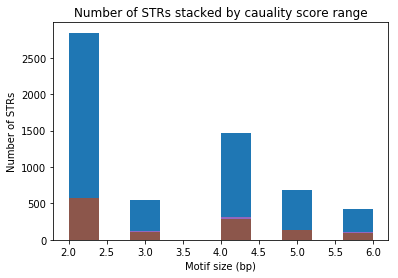

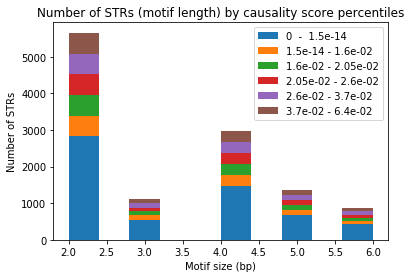

In [64]:
###    (a) Composition of each causality-score bin by STR motif size
FEAT = pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/Merged_Causality_Features.table", sep='\t')
bins = np.percentile(FEAT[FEAT["best.q"]<=MINQ]["best.score"], q = percentiles)
B = []
print(len(bins)-1)
plt.figure()
for i in range(len(bins)-1):
    #print(i)
    lb = bins[i]
    ub = bins[i+1]
    x = FEAT[(FEAT["best.score"]>lb) & (FEAT["best.score"]<= ub) & (FEAT["best.q"]<=1)]
    B.append(list(x['motif_len']))
    #print(x.head(5))
    plt.hist(x['motif_len'], stacked=True)
    x=0
plt.xlabel('Motif size (bp)')
plt.ylabel('Number of STRs')
plt.title("Number of STRs stacked by cauality score range")
plt.show()


plt.hist(B, stacked=True)
plt.legend(['0  -  1.5e-14', '1.5e-14 - 1.6e-02', '1.6e-02 - 2.05e-02', '2.05e-02 - 2.6e-02', '2.6e-02 - 3.7e-02' , '3.7e-02 - 6.4e-02', '6.4e-02 - 9.4e-01'])
plt.title("Number of STRs (motif length) by causality score percentiles")
plt.xlabel('Motif size (bp)')
plt.ylabel('Number of STRs')
plt.show()

#x['motif_len']